In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('airfoil_self_noise0.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X = data.drop('noise', axis=1)
feature_names = X.columns
X = robust_scaler.fit_transform(X)
y = data['noise']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [6]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['RandomForest','XGBoost','Bagging','DNN'])

In [9]:
# 1. Import the estimator object (model)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# 2. Create an instance of the estimator
RF = RandomForestRegressor(n_estimators=1400, bootstrap=True,max_depth=100,max_features="auto",
                           min_samples_leaf=1, min_samples_split=2)
# 3. Use the trainning data to train the estimator
RF.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_test), 
                                                   y_true=y_test)

models.loc['train_r2','RandomForest'] = r2_score(y_pred=RF.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_r2','RandomForest'] = r2_score(y_pred=RF.predict(X_test), 
                                                   y_true=y_test)

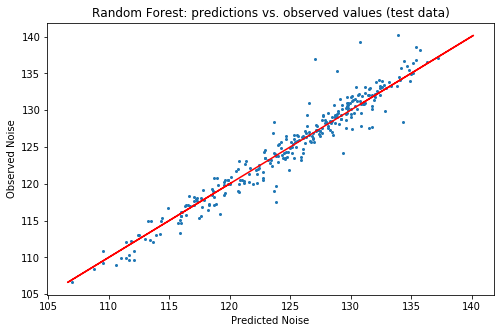

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(RF.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Random Forest: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Noise')
ax.set_ylabel('Observed Noise');

In [22]:
# 1. Import the estimator object (model)
import xgboost as xgb

# 2. Create an instance of the estimator
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=6)
# 3. Use the trainning data to train the estimator
xgb_model.fit(X_train, y_train) 
# 4. Evaluate the model
models.loc['train_mse','XGBoost'] = mean_squared_error(y_pred=xgb_model.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_mse','XGBoost'] = mean_squared_error(y_pred=xgb_model.predict(X_test), 
                                                   y_true=y_test)
models.loc['train_r2','XGBoost'] = r2_score(y_pred=xgb_model.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_r2','XGBoost'] = r2_score(y_pred=xgb_model.predict(X_test), 
                                                   y_true=y_test)

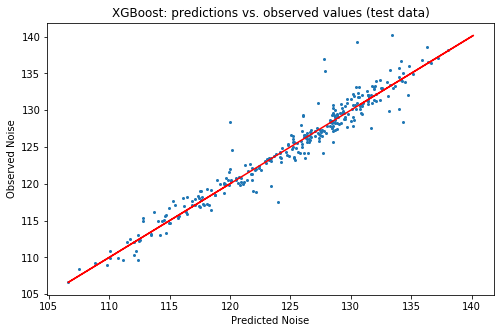

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(xgb_model.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('XGBoost: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Noise')
ax.set_ylabel('Observed Noise');

In [19]:
# 1. Import the estimator object (model)
from sklearn.utils import check_random_state
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# 2. Create an instance of the estimator
rng = check_random_state(0)
knn_for_bagging = DecisionTreeRegressor()


bagging = BaggingRegressor(base_estimator=knn_for_bagging,n_estimators=50,
                           bootstrap=True,
                           oob_score=True,
                           random_state=rng)

# 3. Use the trainning data to train the estimator

bagging.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_mse','Bagging'] = mean_squared_error(y_pred=bagging.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_mse','Bagging'] = mean_squared_error(y_pred=bagging.predict(X_test), 
                                                   y_true=y_test)
models.loc['train_r2','Bagging'] = r2_score(y_pred=bagging.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_r2','Bagging'] = r2_score(y_pred=bagging.predict(X_test), 
                                                   y_true=y_test)

Network Structure
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 5)                 0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               768       
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 64)                4160      
_________________________________________________________________
hidden4 (Dense)              (None, 64)                4160      
_________________________________________________________________
hidden5 (Dense)              (None, 64)                4160      
_________________________________________________________________
final (Dense)                (None, 1)                 65 

1202/1202 [==============================] - 1s 523us/step - loss: 1.2007 - val_loss: 1.2210
Epoch 66/500
1202/1202 [==============================] - 1s 538us/step - loss: 1.4361 - val_loss: 2.2228
Epoch 67/500
1202/1202 [==============================] - 1s 580us/step - loss: 1.2809 - val_loss: 1.2968
Epoch 68/500
1202/1202 [==============================] - 1s 444us/step - loss: 1.2357 - val_loss: 1.5285
Epoch 69/500
1202/1202 [==============================] - 1s 518us/step - loss: 1.2851 - val_loss: 1.3301
Epoch 70/500
1202/1202 [==============================] - 1s 475us/step - loss: 1.2644 - val_loss: 1.5384
Epoch 71/500
1202/1202 [==============================] - 1s 522us/step - loss: 1.4863 - val_loss: 1.3263
Epoch 72/500
1202/1202 [==============================] - 1s 530us/step - loss: 1.2102 - val_loss: 1.2552
Epoch 73/500
1202/1202 [==============================] - 1s 567us/step - loss: 1.1997 - val_loss: 1.8342
Epoch 74/500
1202/1202 [==============================] - 1

1202/1202 [==============================] - 0s 393us/step - loss: 1.0067 - val_loss: 0.8808
Epoch 143/500
1202/1202 [==============================] - 0s 409us/step - loss: 0.9209 - val_loss: 1.0496
Epoch 144/500
1202/1202 [==============================] - 1s 606us/step - loss: 0.8862 - val_loss: 1.2827
Epoch 145/500
1202/1202 [==============================] - 1s 607us/step - loss: 1.1045 - val_loss: 0.9900
Epoch 146/500
1202/1202 [==============================] - 1s 510us/step - loss: 0.9145 - val_loss: 1.0277
Epoch 147/500
1202/1202 [==============================] - 1s 466us/step - loss: 0.9029 - val_loss: 0.8386
Epoch 148/500
1202/1202 [==============================] - 1s 447us/step - loss: 0.8574 - val_loss: 0.8584
Epoch 149/500
1202/1202 [==============================] - 0s 406us/step - loss: 0.9977 - val_loss: 1.4871
Epoch 150/500
1202/1202 [==============================] - 1s 465us/step - loss: 1.1230 - val_loss: 1.1058
Epoch 151/500
1202/1202 [==========================

1202/1202 [==============================] - 1s 521us/step - loss: 0.7225 - val_loss: 1.1044
Epoch 219/500
1202/1202 [==============================] - 1s 476us/step - loss: 0.8043 - val_loss: 0.8049
Epoch 220/500
1202/1202 [==============================] - 1s 561us/step - loss: 0.7031 - val_loss: 0.8129
Epoch 221/500
1202/1202 [==============================] - 1s 497us/step - loss: 0.7774 - val_loss: 0.9498
Epoch 222/500
1202/1202 [==============================] - 1s 501us/step - loss: 0.7781 - val_loss: 0.9286
Epoch 223/500
1202/1202 [==============================] - 1s 446us/step - loss: 0.8036 - val_loss: 0.8590
Epoch 224/500
1202/1202 [==============================] - 1s 501us/step - loss: 0.9024 - val_loss: 0.7357
Epoch 225/500
1202/1202 [==============================] - 1s 445us/step - loss: 0.7855 - val_loss: 0.7579
Epoch 226/500
1202/1202 [==============================] - 1s 439us/step - loss: 0.7652 - val_loss: 0.7441
Epoch 227/500
1202/1202 [==========================

1202/1202 [==============================] - 1s 683us/step - loss: 0.7914 - val_loss: 0.6845
Epoch 295/500
1202/1202 [==============================] - 1s 527us/step - loss: 0.7113 - val_loss: 0.8622
Epoch 296/500
1202/1202 [==============================] - 1s 518us/step - loss: 0.8065 - val_loss: 0.7745
Epoch 297/500
1202/1202 [==============================] - 1s 473us/step - loss: 0.6228 - val_loss: 0.7994
Epoch 298/500
1202/1202 [==============================] - 1s 509us/step - loss: 0.6499 - val_loss: 0.8976
Epoch 299/500
1202/1202 [==============================] - 1s 484us/step - loss: 0.8356 - val_loss: 0.7262
Epoch 300/500
1202/1202 [==============================] - 1s 455us/step - loss: 0.5780 - val_loss: 0.7157
Epoch 301/500
1202/1202 [==============================] - 1s 468us/step - loss: 0.6202 - val_loss: 0.8687
Epoch 302/500
1202/1202 [==============================] - 1s 495us/step - loss: 0.7364 - val_loss: 0.7900
Epoch 303/500
1202/1202 [==========================

1202/1202 [==============================] - ETA: 0s - loss: 0.617 - 1s 520us/step - loss: 0.6153 - val_loss: 0.6339
Epoch 371/500
1202/1202 [==============================] - 1s 565us/step - loss: 0.5517 - val_loss: 0.7499
Epoch 372/500
1202/1202 [==============================] - 1s 475us/step - loss: 0.6524 - val_loss: 1.3869
Epoch 373/500
1202/1202 [==============================] - 1s 489us/step - loss: 0.7553 - val_loss: 0.6501
Epoch 374/500
1202/1202 [==============================] - 1s 465us/step - loss: 0.5766 - val_loss: 0.7218
Epoch 375/500
1202/1202 [==============================] - 1s 481us/step - loss: 0.6053 - val_loss: 0.8288
Epoch 376/500
1202/1202 [==============================] - 1s 471us/step - loss: 0.6114 - val_loss: 0.7317
Epoch 377/500
1202/1202 [==============================] - 1s 510us/step - loss: 0.6375 - val_loss: 0.6460
Epoch 378/500
1202/1202 [==============================] - 1s 566us/step - loss: 0.6097 - val_loss: 0.7161
Epoch 379/500
1202/1202 [==

1202/1202 [==============================] - 1s 442us/step - loss: 0.5705 - val_loss: 0.7720
Epoch 447/500
1202/1202 [==============================] - 0s 413us/step - loss: 0.8019 - val_loss: 1.1963
Epoch 448/500
1202/1202 [==============================] - 1s 444us/step - loss: 0.7911 - val_loss: 0.7914
Epoch 449/500
1202/1202 [==============================] - 1s 438us/step - loss: 0.6637 - val_loss: 0.7149
Epoch 450/500
1202/1202 [==============================] - 1s 527us/step - loss: 0.6870 - val_loss: 0.6076
Epoch 451/500
1202/1202 [==============================] - 1s 487us/step - loss: 0.5709 - val_loss: 0.6768
Epoch 452/500
1202/1202 [==============================] - 1s 426us/step - loss: 0.5557 - val_loss: 0.6401
Epoch 453/500
1202/1202 [==============================] - 1s 497us/step - loss: 0.5387 - val_loss: 0.6783
Epoch 454/500
1202/1202 [==============================] - 1s 448us/step - loss: 0.7103 - val_loss: 1.0511
Epoch 455/500
1202/1202 [==========================

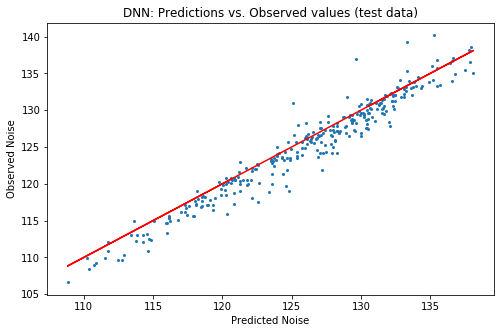

In [14]:
# random seed setting for reproducibility
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from keras import optimizers
from keras import losses
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt


TRAIN_DATA = "airfoil_self_noise0.csv"

def load_data():
    """Loads train, val, and test datasets from disk"""
    data = pd.read_csv(TRAIN_DATA)
    
    # we will use sklearn's StandardScaler to scale our data to 0 mean, unit variance.    
    StandardScaler = RobustScaler()
    X = data.drop('noise', axis=1)
    X = StandardScaler.fit_transform(X)
    y = data["noise"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

    # we will use a dict to keep all this data tidy.
    data = dict()

    data["train_y"] = y_train
    data["train_X"] = X_train
    data["val_y"] = y_test
    data["val_X"] = X_test

    # it's a good idea to keep the scaler (or at least the mean/variance) so we can unscale predictions
    data["scaler"] = StandardScaler
    return data

def build_network(input_features=None):
    # first we specify an input layer, with a shape == features
    inputs = Input(shape=(input_features,), name="input")
    x = Dense(128, activation='relu', name="hidden1")(inputs)
    x = Dense(64, activation='relu', name="hidden2")(x)
    x = Dense(64, activation='relu', name="hidden3")(x)
    x = Dense(64, activation='relu', name="hidden4")(x)
    x = Dense(64, activation='relu', name="hidden5")(x)
    # for regression we will use a single neuron with linear (no) activation
    prediction = Dense(1, activation='linear', name="final")(x)

    model = Model(inputs=inputs, outputs=prediction)
    opt = optimizers.Adam(lr=0.001)
    model.compile(optimizer=opt, loss=losses.logcosh)
    return model

def main():
    data = load_data()

    # Network with single 64 neuron hidden layer...
    input_features = data["train_X"].shape[1]
    model = build_network(input_features=input_features)
    print("Network Structure")
    print(model.summary())
    print("Training Data Shape: " + str(data["train_X"].shape))
    model.fit(x=data["train_X"], y=data["train_y"], batch_size=32, epochs=500, verbose=1,
              validation_data=(data["val_X"], data["val_y"]))


    print("Model Train MAE: " + str(mean_absolute_error(data["train_y"], model.predict(data["train_X"]))))
    print("Model Val MAE: " + str(mean_absolute_error(data["val_y"], model.predict(data["val_X"]))))
    print("Model Train MSE: " + str(mean_squared_error(data["train_y"], model.predict(data["train_X"]))))
    print("Model Val MSE: " + str(mean_squared_error(data["val_y"], model.predict(data["val_X"]))))   
    
    models.loc['train_mse','DNN'] = mean_squared_error(y_pred=model.predict(data["train_X"]),y_true=y_train)
    models.loc['test_mse','DNN'] = mean_squared_error(y_pred=model.predict(data["val_X"]), y_true=y_test)
    models.loc['train_r2','DNN'] = r2_score(y_pred=model.predict(data["train_X"]), y_true=y_train)
    models.loc['test_r2','DNN'] = r2_score(y_pred=model.predict(data["val_X"]), y_true=y_test)   
    
    y_hat = model.predict(data["val_X"])
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(y_hat,data["val_y"], s=4)
    ax.plot(y_hat, y_hat, color='red')
    ax.set_title('DNN: Predictions vs. Observed values (test data)')
    ax.set_xlabel('Predicted Noise')
    ax.set_ylabel('Observed Noise')    
    


if __name__ == "__main__":
    main()


In [23]:
models

,RandomForest,XGBoost,Bagging,DNN
train_mse,0.415905,0.455895,0.490195,2.72283
test_mse,2.85517,2.85487,2.92753,3.15675
train_r2,0.991334,0.9905,0.989785,0.943263
test_r2,0.937671,0.937678,0.936092,0.931088


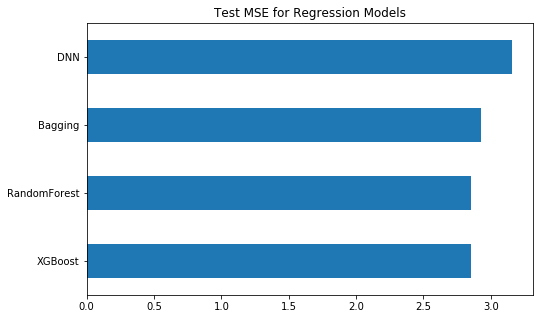

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['test_mse'].sort_values().plot(kind='barh', ax=ax)
ax.set_title('Test MSE for Regression Models');

In [26]:
data.head()

,frequency,aoa,chord,vinf,delta,noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
